In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA 수집

> 1. 열대우림 생태계 생물 소리 데이터 (KAGGLE)
2. 자연 발생 소리 데이터 (KAGGLE)
3. 벌목 소리 data 직접 수집 (YOUTUBE 크롤링 및 음원 추출)

## 1. 열대우림 생태계 생물 소리 데이터

- data 용량이 큰 관계로 Kaggle 상에서 전처리 후, 필요한 data만 다운 후 COLAB에서 load하여 사용
- DATA PREPROCESSING CODE는 따로 첨부

- https://www.kaggle.com/competitions/rfcx-species-audio-detection/data

In [ ]:
# import zipfile
# import os

# # ZIP 파일 경로 및 추출 경로 설정
# zip_file_path = "/content/drive/MyDrive/DLPROJECT/DATA/BIRD DATA/Bird_processed_audio.zip"
# extract_to_path = "/content/drive/MyDrive/DLPROJECT/DATA/BIRD DATA/Extracted_Audio_BIRD"

# # ZIP 파일 열기
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     # 압축 해제
#     zip_ref.extractall(extract_to_path)

# print(f"ZIP 파일이 {extract_to_path} 경로에 성공적으로 추출되었습니다.")


ZIP 파일이 /content/drive/MyDrive/DLPROJECT/DATA/BIRD DATA/Extracted_Audio_BIRD 경로에 성공적으로 추출되었습니다.


## 2. 자연 발생 소리 데이터

- data 용량이 큰 관계로 Kaggle 상에서 전처리 후, 필요한 data만 다운 후 COLAB에서 load하여 사용
- KAGGLE environmental-sound-classification DATA SET
- https://www.kaggle.com/datasets/mmoreaux/environmental-sound-classification-50

In [ ]:
# # ZIP 파일 경로 및 추출 경로 설정
# zip_file_path = "/content/drive/MyDrive/DLPROJECT/DATA/ENVIRONMENT DATA/Environment_audio.zip"
# extract_to_path = "/content/drive/MyDrive/DLPROJECT/DATA/ENVIRONMENT DATA/Extracted_Audio_ENVIRONMENT"

# # ZIP 파일 열기
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     # 압축 해제
#     zip_ref.extractall(extract_to_path)

# print(f"ZIP 파일이 {extract_to_path} 경로에 성공적으로 추출되었습니다.")

ZIP 파일이 /content/drive/MyDrive/DLPROJECT/DATA/ENVIRONMENT DATA/Extracted_Audio_ENVIRONMENT 경로에 성공적으로 추출되었습니다.


## 3. 불법 벌목 소리 데이터
> 벌목(Logging, Chainsaw) 관련 Youtube 영상 LIST를 기반으로 해당 영상들에서 소리 data set 추출

- GOOGLE AUDIO DATA SET LIST : https://research.google.com/audioset/dataset/chainsaw.html

In [ ]:
# # ZIP 파일 경로 및 추출 경로 설정
# zip_file_path = "/content/drive/MyDrive/DLPROJECT/DATA/LOGGING DATA/LOGGING_audio_clips.zip"
# extract_to_path = "/content/drive/MyDrive/DLPROJECT/DATA/LOGGING DATA/Extracted_Audio_LOGGING"

# # ZIP 파일 열기
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     # 압축 해제
#     zip_ref.extractall(extract_to_path)

# print(f"ZIP 파일이 {extract_to_path} 경로에 성공적으로 추출되었습니다.")

ZIP 파일이 /content/drive/MyDrive/DLPROJECT/DATA/LOGGING DATA/Extracted_Audio_LOGGING 경로에 성공적으로 추출되었습니다.


## DATA LABELING

> - LOGGING:
logging_path에서 가져온 파일은 레이블이 "LOGGING"으로 지정
- NON-LOGGING:
bird_path와 environment_path에서 가져온 파일은 레이블이 "NON-LOGGING"으로 지정

In [ ]:
import os
import pandas as pd

# 데이터 경로 설정
bird_path = "/content/drive/MyDrive/DLPROJECT/DATA/BIRD DATA/Extracted_Audio_BIRD"
environment_path = "/content/drive/MyDrive/DLPROJECT/DATA/ENVIRONMENT DATA/Extracted_Audio_ENVIRONMENT"
logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/LOGGING DATA/Extracted_Audio_LOGGING"

# 파일 경로와 레이블 저장
data = []

# 하위 폴더까지 탐색하며 파일 처리 함수
def process_folder(folder_path, label):
    for root, _, files in os.walk(folder_path):  # os.walk로 하위 폴더까지 탐색
        for file_name in files:
            if file_name.endswith(".wav"):  # .wav 파일만 추가
                file_path = os.path.join(root, file_name)
                data.append({"file_path": file_path, "label": label})

# LOGGING 데이터 처리
process_folder(logging_path, "LOGGING")

# NON-LOGGING 데이터 처리 (BIRD + ENVIRONMENT)
process_folder(bird_path, "NON-LOGGING")
process_folder(environment_path, "NON-LOGGING")

# DataFrame 생성
df = pd.DataFrame(data)

# CSV 저장
csv_path = "/content/drive/MyDrive/DLPROJECT/DATA/combined_dataset.csv"
df.to_csv(csv_path, index=False)

print(f"CSV 파일 생성 완료: {csv_path}")


CSV 파일 생성 완료: /content/drive/MyDrive/DLPROJECT/DATA/combined_dataset.csv


In [ ]:
import os

# 경로 설정
logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/LOGGING DATA/Extracted_Audio_LOGGING"

# .wav 파일 개수 계산
wav_files = [file for file in os.listdir(logging_path) if file.endswith(".wav")]
file_count = len(wav_files)

print("전체 data 길이 :", len(df))
print("전체 LOGGING DATA 수 :", file_count)

전체 data 길이 : 1665
전체 LOGGING DATA 수 : 1141


# 불균형한 DATA 분포 해결을 위한 ratio 일치

- LOGGING DATA와 NON-LOGGING DATA의 ratio가 1:1이 되도록 DATA 만들기
- 1141개 중 524개의 logging sound data만 사용하여 non - logging data와 결합

In [ ]:
import os
import pandas as pd
import librosa

# 데이터 경로 설정
bird_path = "/content/drive/MyDrive/DLPROJECT/DATA/BIRD DATA/Extracted_Audio_BIRD"
environment_path = "/content/drive/MyDrive/DLPROJECT/DATA/ENVIRONMENT DATA/Extracted_Audio_ENVIRONMENT"
logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/LOGGING DATA/Extracted_Audio_LOGGING"

# 파일 경로와 레이블 저장
data = []

# 하위 폴더까지 탐색하며 파일 처리 함수
def process_folder(folder_path, label, filter_duration=None):
    folder_data = []
    for root, _, files in os.walk(folder_path):  # os.walk로 하위 폴더까지 탐색
        for file_name in files:
            if file_name.endswith(".wav"):  # .wav 파일만 추가
                file_path = os.path.join(root, file_name)
                # 길이 필터 적용 (옵션)
                if filter_duration is not None:
                    try:
                        y, sr = librosa.load(file_path, sr=None)
                        duration = librosa.get_duration(y=y, sr=sr)
                        if round(duration) != filter_duration:
                            continue
                    except Exception as e:
                        print(f"오류 발생: {file_path}, {e}")
                        continue
                folder_data.append({"file_path": file_path, "label": label})
    return folder_data

# LOGGING 데이터 처리 (5초 길이만 선택)
logging_data = process_folder(logging_path, "LOGGING", filter_duration=5)
if len(logging_data) > 524:
    logging_data = pd.DataFrame(logging_data).sample(524, random_state=42).to_dict(orient='records')

# NON-LOGGING 데이터 처리 (전체 사용)
non_logging_data = process_folder(bird_path, "NON-LOGGING") + process_folder(environment_path, "NON-LOGGING")

# 데이터 병합
data = logging_data + non_logging_data

# DataFrame 생성
df = pd.DataFrame(data)

# CSV 저장
csv_path = "/content/drive/MyDrive/DLPROJECT/DATA/combined_dataset_ratio.csv"
df.to_csv(csv_path, index=False)

print(f"CSV 파일 생성 완료: {csv_path}")

CSV 파일 생성 완료: /content/drive/MyDrive/DLPROJECT/DATA/combined_dataset_ratio.csv


## TRAIN / VALIDATION / TEST SPLIT

In [ ]:
import shutil
import os
import pandas as pd

# CSV 파일 경로
csv_path = "/content/drive/MyDrive/DLPROJECT/DATA/combined_dataset_ratio.csv"

# 데이터셋 저장 경로 설정
output_dataset_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training"
os.makedirs(output_dataset_path, exist_ok=True)

# CSV 파일 로드
df = pd.read_csv(csv_path)

# 데이터 복사
for index, row in df.iterrows():
    source_path = row["file_path"]
    label = row["label"]
    label_folder = os.path.join(output_dataset_path, label)
    os.makedirs(label_folder, exist_ok=True)  # 레이블 폴더 생성
    destination_path = os.path.join(label_folder, os.path.basename(source_path))
    shutil.copy(source_path, destination_path)  # 데이터 복사

print(f"데이터셋이 {output_dataset_path} 경로에 성공적으로 생성되었습니다!")


데이터셋이 /content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training 경로에 성공적으로 생성되었습니다!


In [ ]:
import os
import librosa
import IPython.display as ipd

# 데이터셋 경로 설정
logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/LOGGING"
non_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/NON-LOGGING"

# 각 경로에서 첫 4개의 파일 가져오기
logging_files = [os.path.join(logging_path, f) for f in os.listdir(logging_path) if f.endswith(".wav")][:5]
non_logging_files = [os.path.join(non_logging_path, f) for f in os.listdir(non_logging_path) if f.endswith(".wav")][:5]

# LOGGING 파일 출력
print("LOGGING Audio Samples:")
for file in logging_files:
    print(f"Playing: {os.path.basename(file)}")
    display(ipd.Audio(file))

# NON-LOGGING 파일 출력
print("\nNON-LOGGING Audio Samples:")
for file in non_logging_files:
    print(f"Playing: {os.path.basename(file)}")
    display(ipd.Audio(file))

Output hidden; open in https://colab.research.google.com to view.

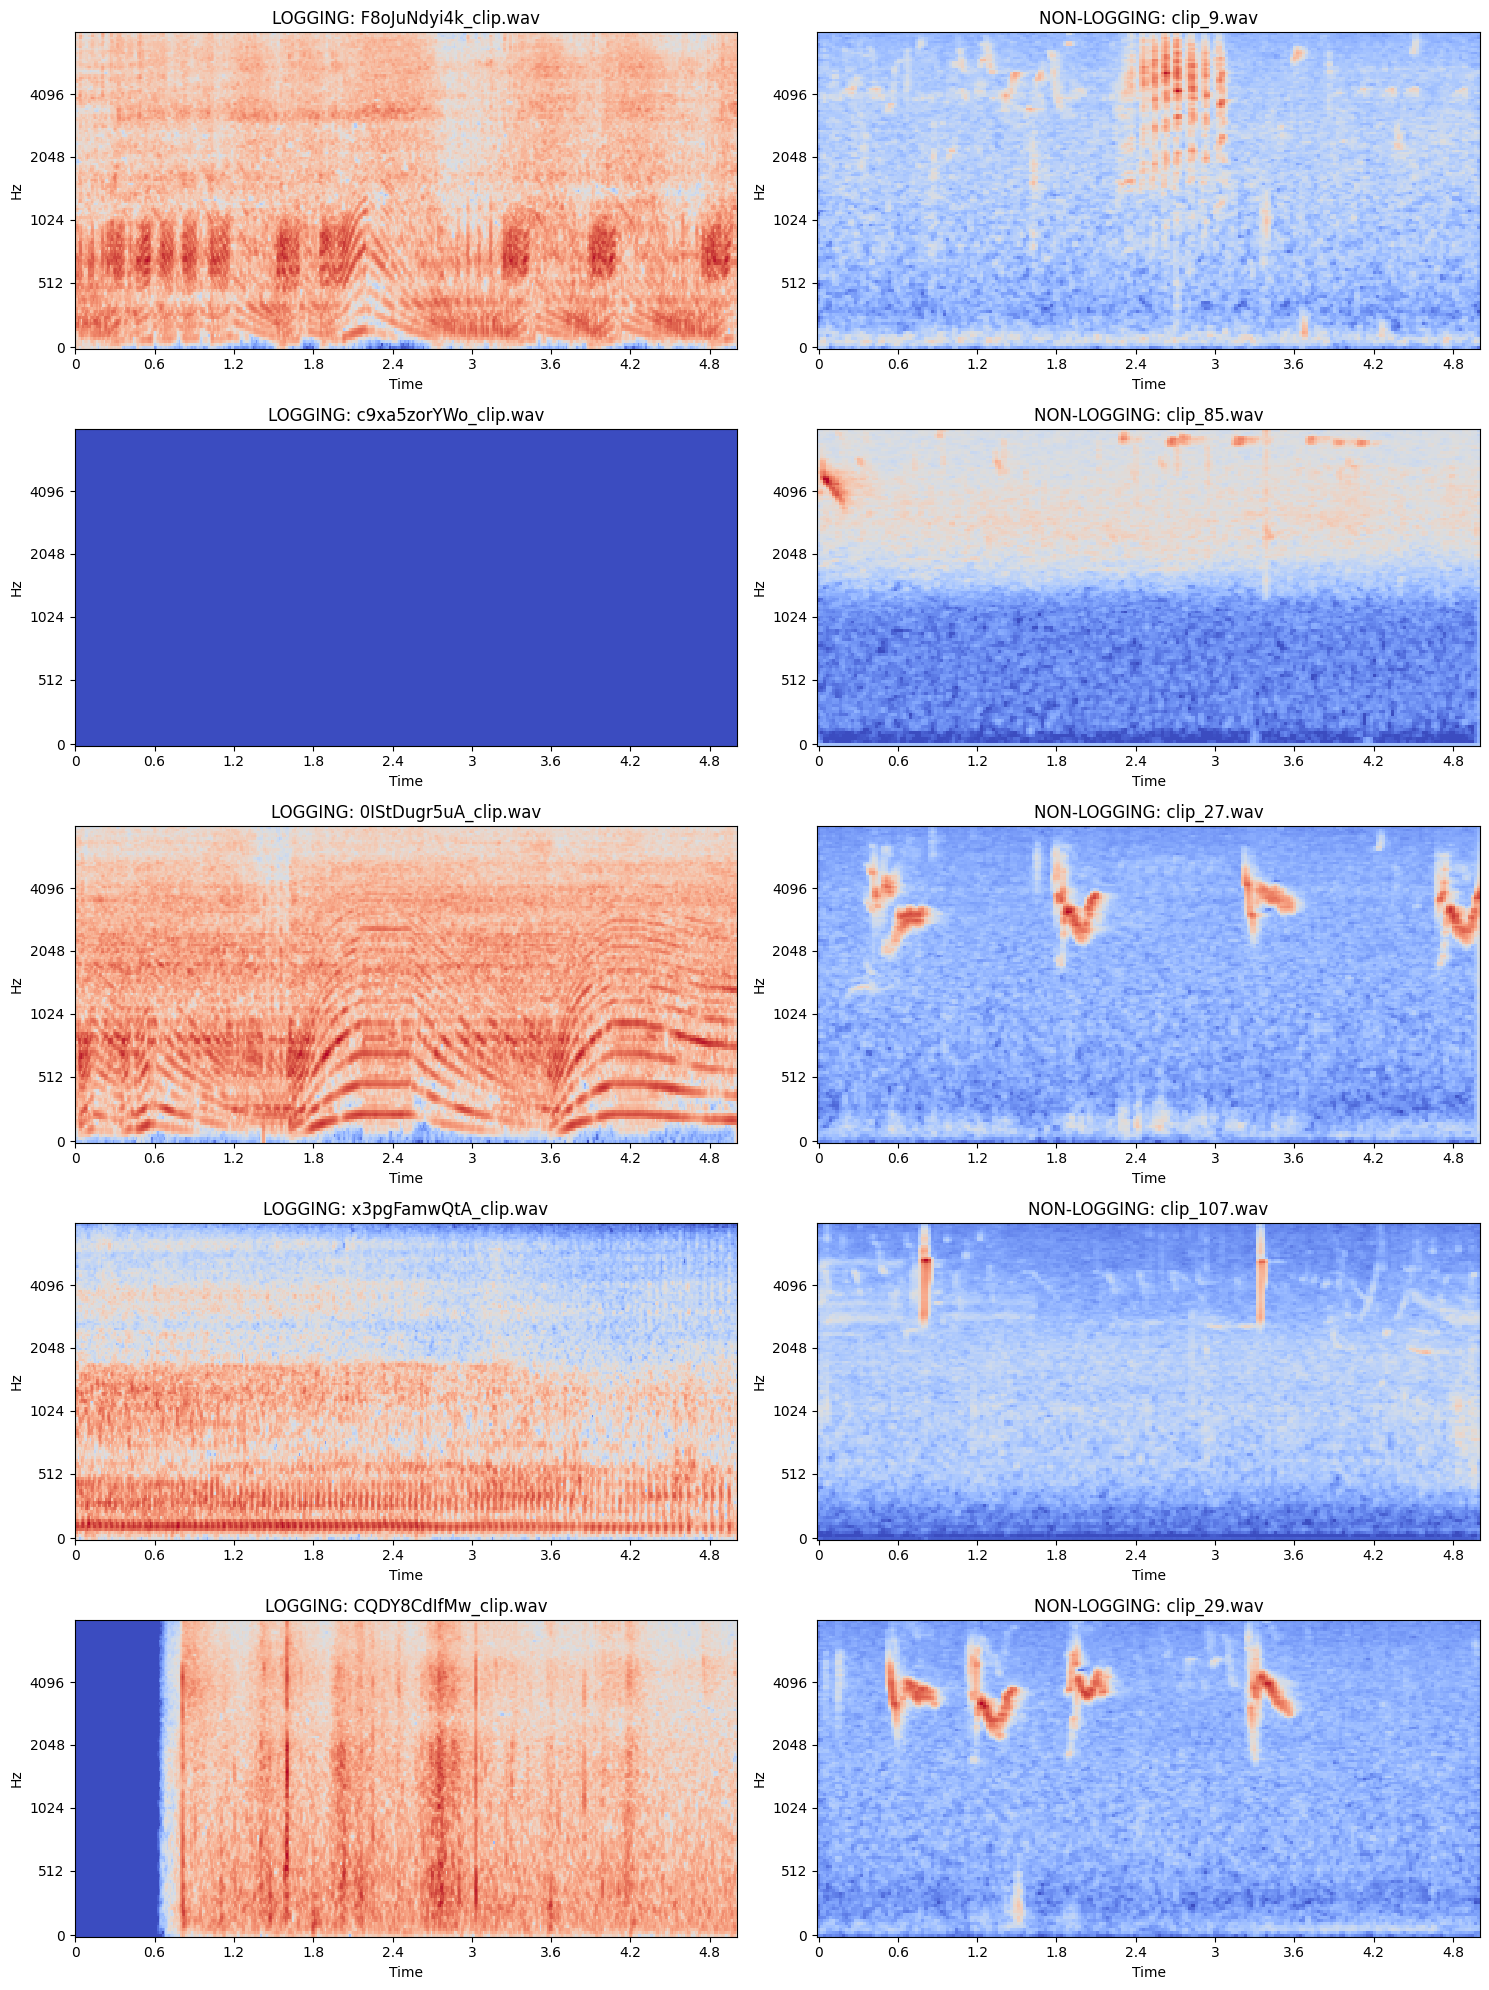

In [3]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 경로 설정
logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/LOGGING"
non_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/NON-LOGGING"

# 각 데이터셋에서 앞의 5개 파일 가져오기
logging_files = [os.path.join(logging_path, f) for f in os.listdir(logging_path) if f.endswith(".wav")][:5]
non_logging_files = [os.path.join(non_logging_path, f) for f in os.listdir(non_logging_path) if f.endswith(".wav")][:5]

# SPECTROGRAM 그리기 함수
def plot_spectrogram(audio_path, ax, title):
    y, sr = librosa.load(audio_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sr, fmax=8000, ax=ax, x_axis='time', y_axis='mel', cmap='coolwarm')
    ax.set_title(title)

# 파일로 SPECTROGRAM 그리기
fig, axs = plt.subplots(5, 2, figsize=(15, 20))  # 5개의 행과 2개의 열

for i, (logging_file, non_logging_file) in enumerate(zip(logging_files, non_logging_files)):
    # LOGGING 데이터의 스펙트로그램
    plot_spectrogram(logging_file, axs[i, 0], f"LOGGING: {os.path.basename(logging_file)}")
    # NON-LOGGING 데이터의 스펙트로그램
    plot_spectrogram(non_logging_file, axs[i, 1], f"NON-LOGGING: {os.path.basename(non_logging_file)}")

plt.tight_layout()
plt.show()


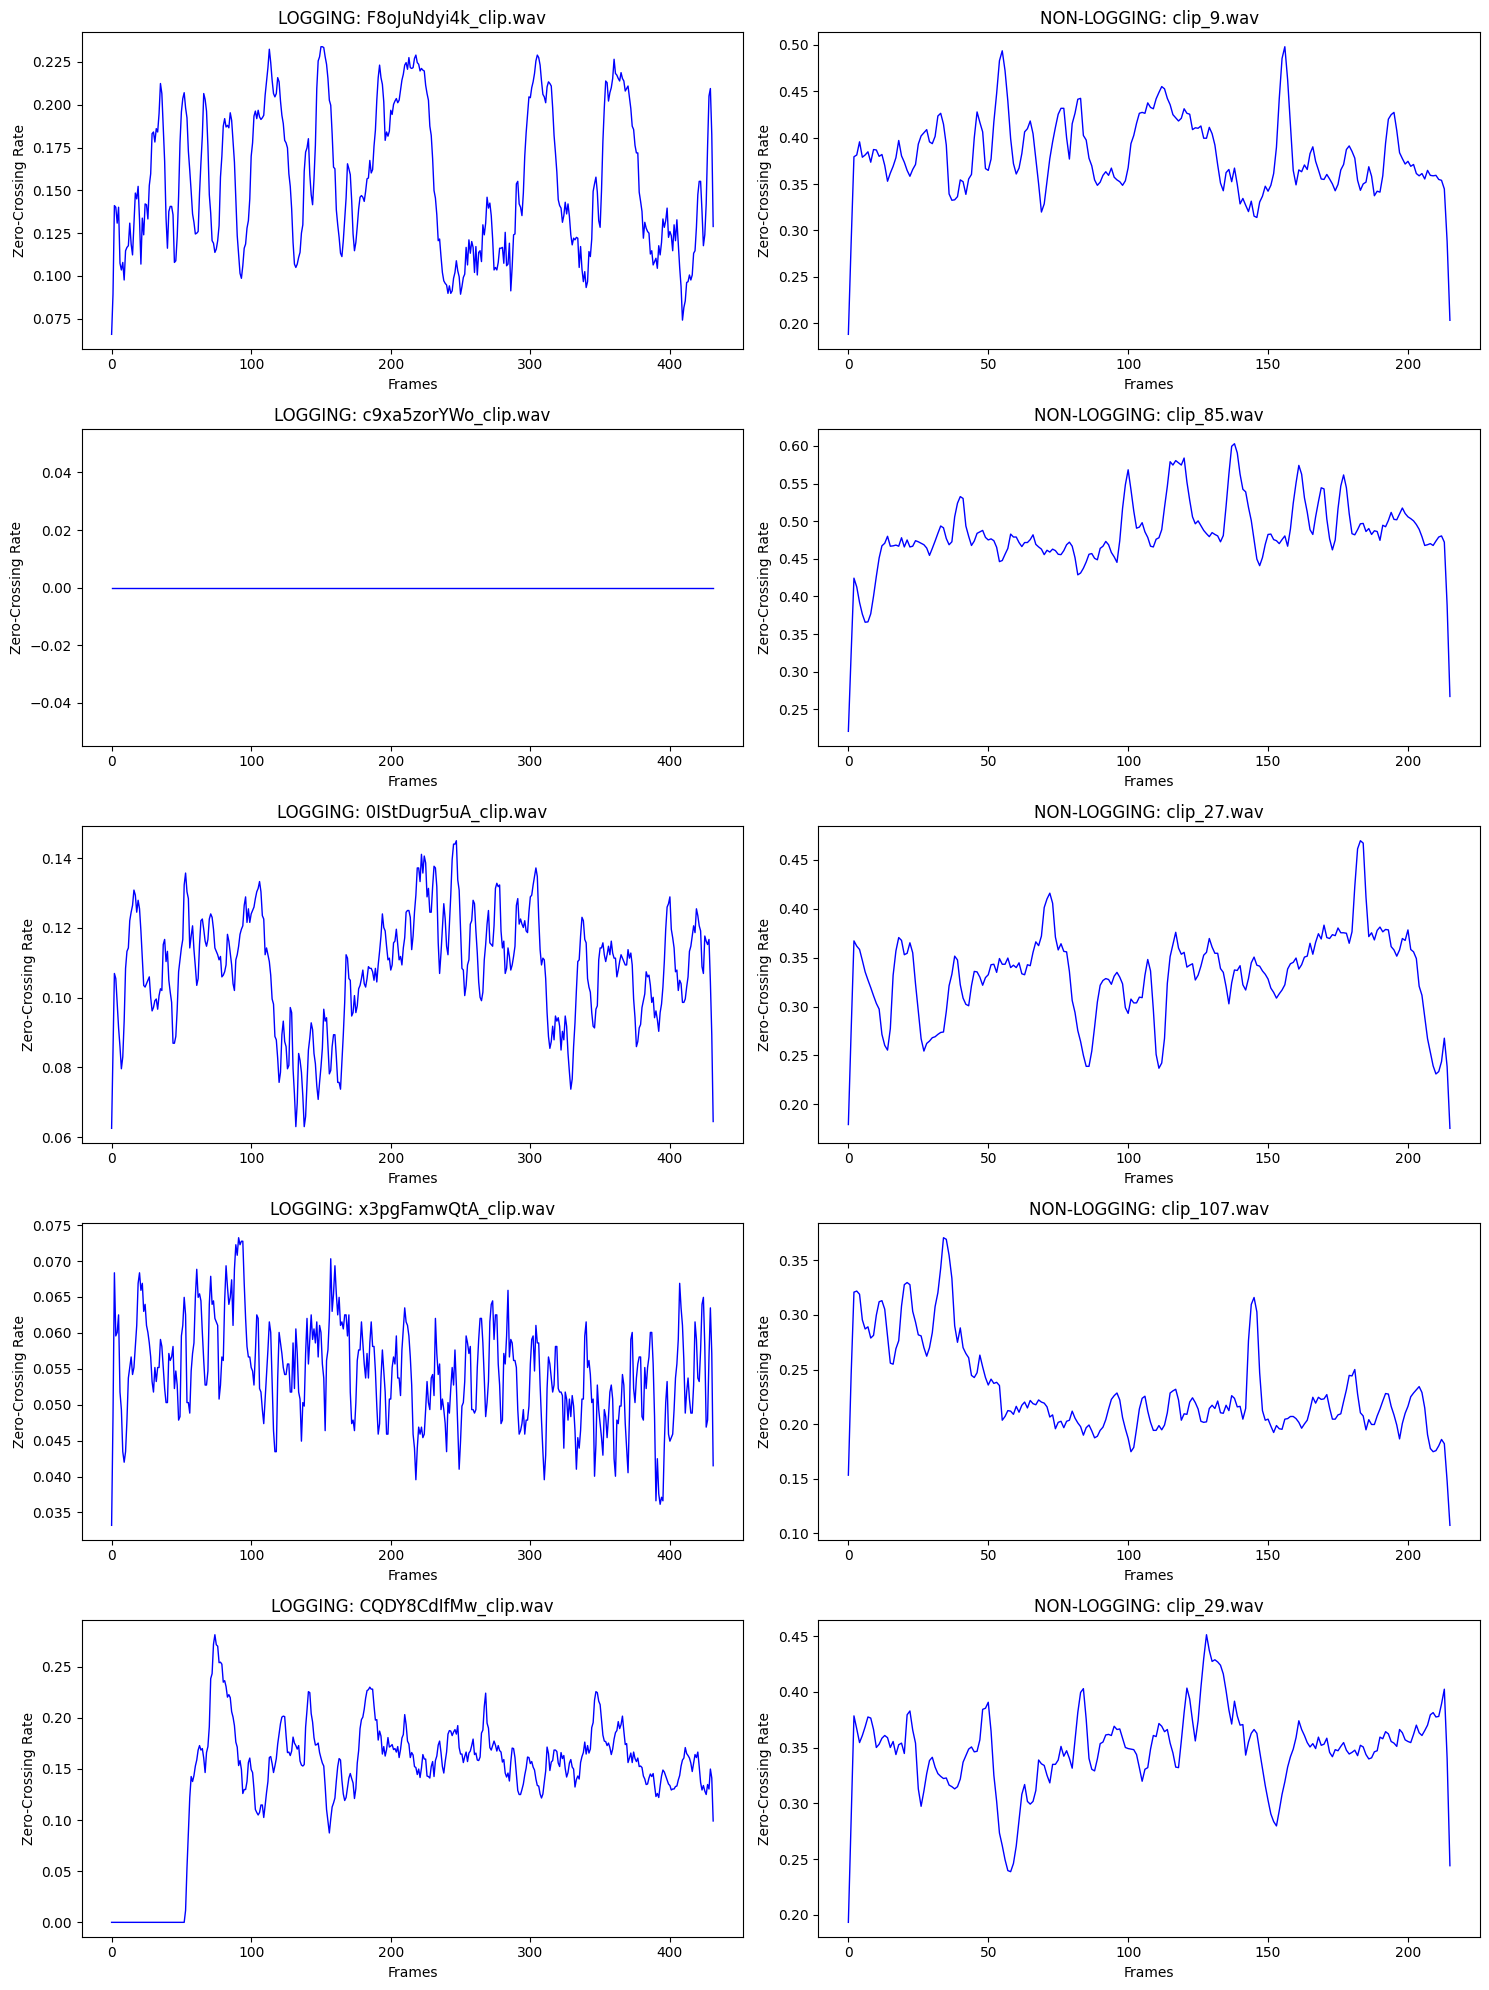

In [ ]:
import os
import random
import librosa
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 경로 설정
logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/LOGGING"
non_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/NON-LOGGING"

# 각 데이터셋에서 앞의 5개 파일 가져오기
logging_files = [os.path.join(logging_path, f) for f in os.listdir(logging_path) if f.endswith(".wav")][:5]
non_logging_files = [os.path.join(non_logging_path, f) for f in os.listdir(non_logging_path) if f.endswith(".wav")][:5]

# Zero-Crossing Rate 그리기 함수
def plot_zcr(audio_path, ax, title):
    y, sr = librosa.load(audio_path, sr=None)
    zcr = librosa.feature.zero_crossing_rate(y)[0]  # 영점교차율 계산
    ax.plot(zcr, color='blue', linewidth=1)
    ax.set_title(title)
    ax.set_xlabel('Frames')
    ax.set_ylabel('Zero-Crossing Rate')

# 샘플링된 파일로 Zero-Crossing Rate 시각화
fig, axs = plt.subplots(5, 2, figsize=(15, 20))  # 5개의 행과 2개의 열

for i, (logging_file, non_logging_file) in enumerate(zip(logging_files, non_logging_files)):
    # LOGGING 데이터의 ZCR
    plot_zcr(logging_file, axs[i, 0], f"LOGGING: {os.path.basename(logging_file)}")
    # NON-LOGGING 데이터의 ZCR
    plot_zcr(non_logging_file, axs[i, 1], f"NON-LOGGING: {os.path.basename(non_logging_file)}")

plt.tight_layout()
plt.show()

## Y축의 range를 맞춰준 Zero Crossing Rate 그래프

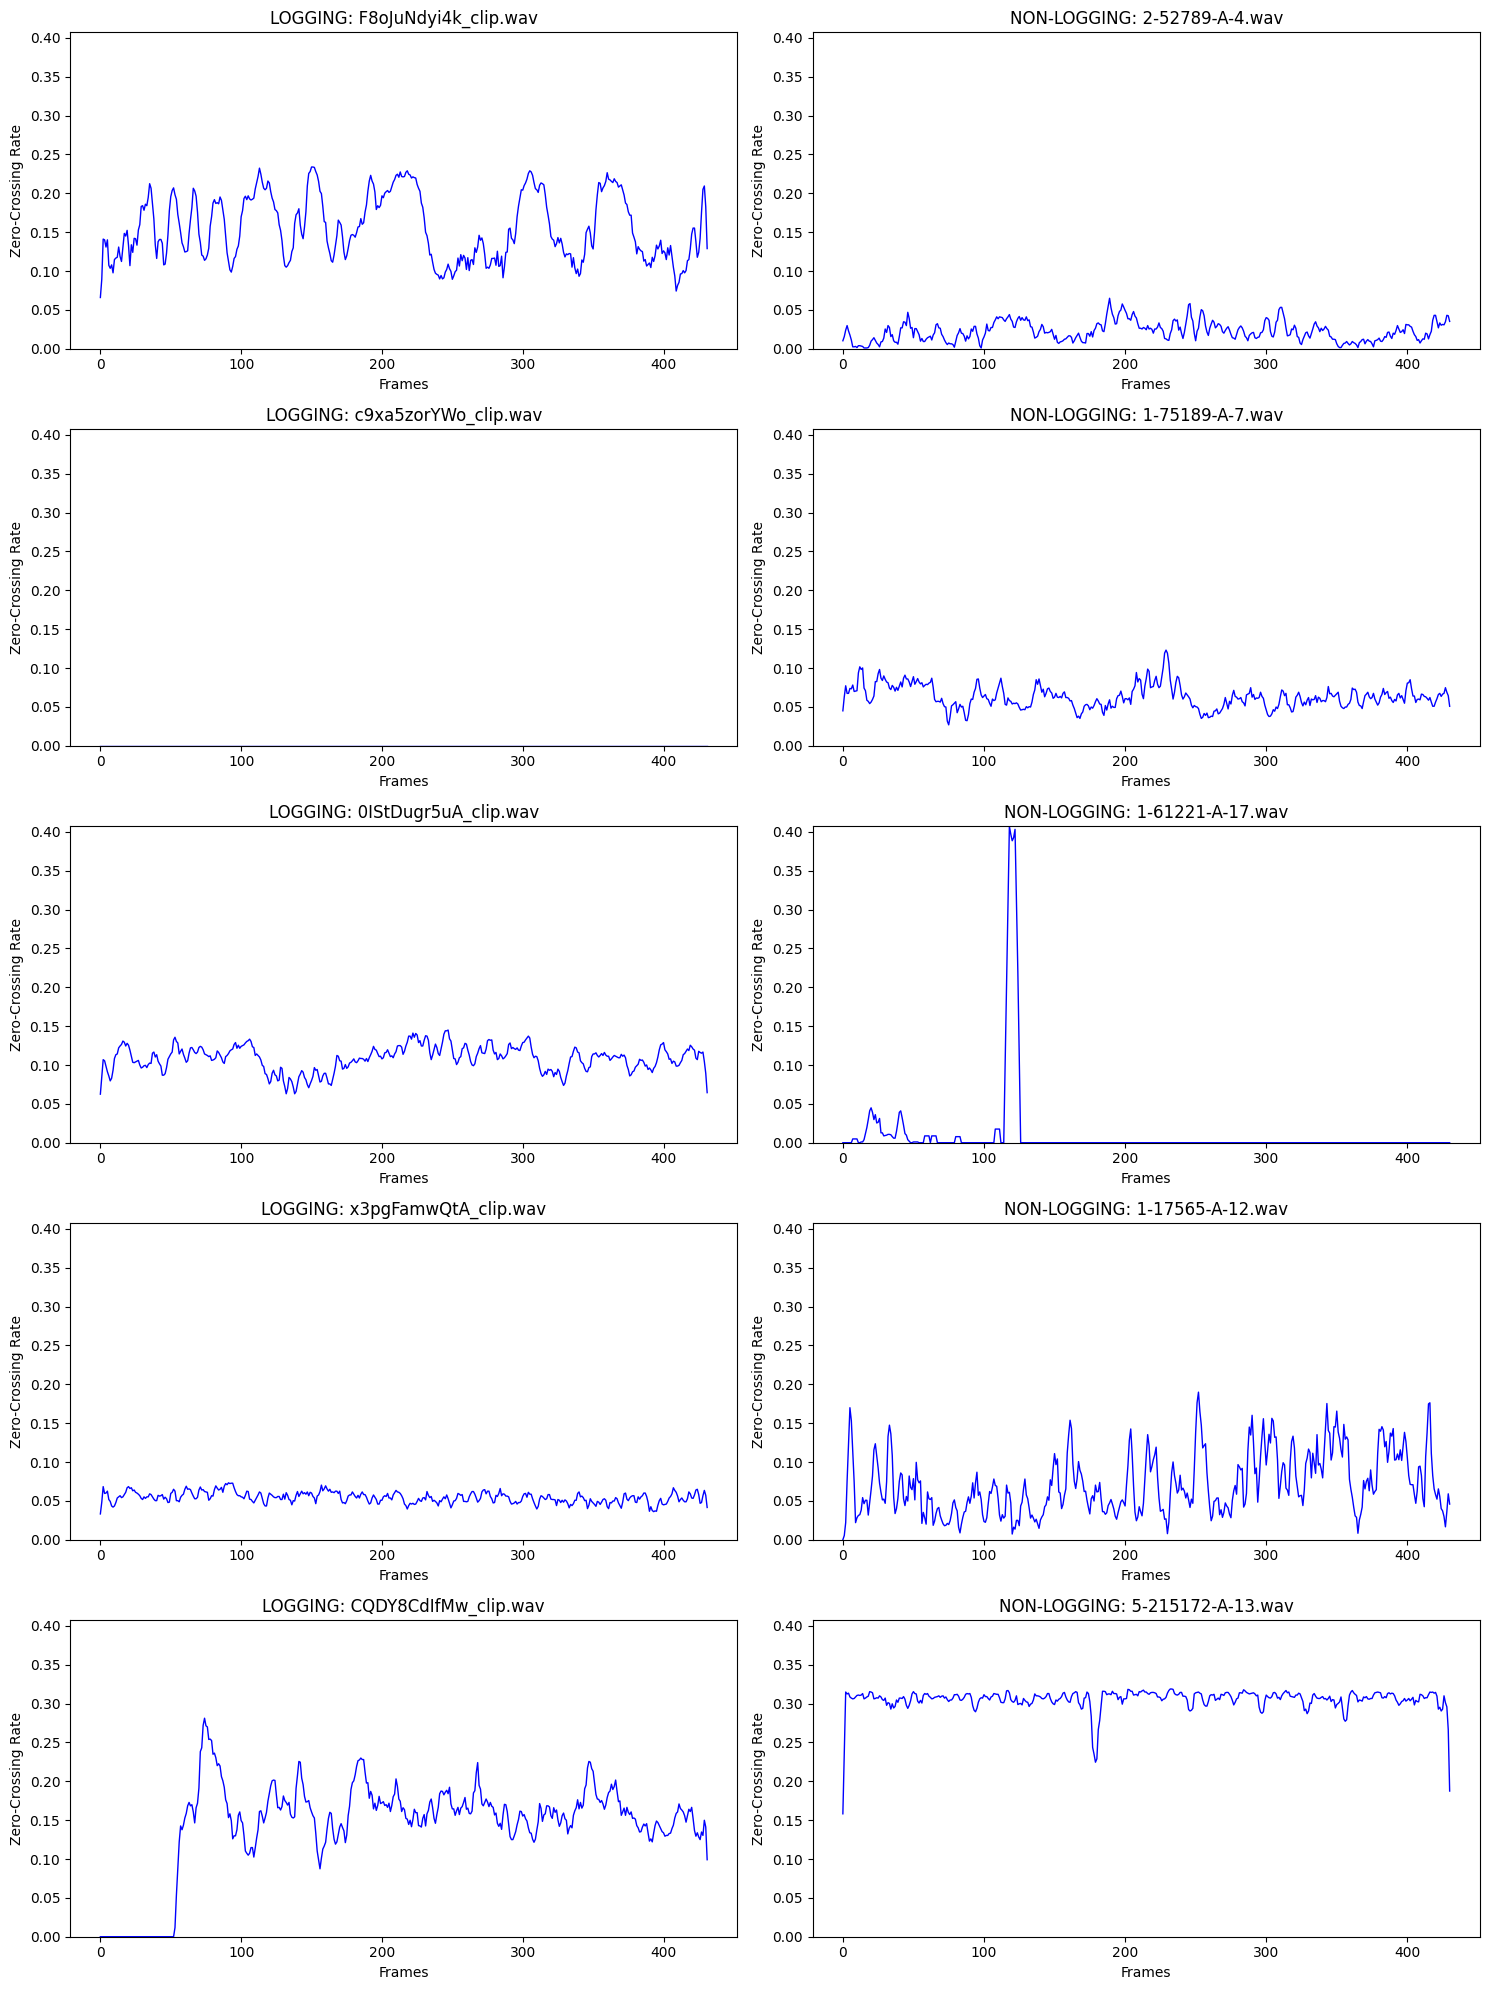

In [ ]:
import os
import random
import librosa
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 경로 설정
logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/LOGGING"
non_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/NON-LOGGING"

# 각 데이터셋에서 앞의 5개 파일 가져오기
logging_files = [os.path.join(logging_path, f) for f in os.listdir(logging_path) if f.endswith(".wav")][:5]
non_logging_files = [os.path.join(non_logging_path, f) for f in os.listdir(non_logging_path) if f.endswith(".wav")][:5]
non_logging_files = random.sample([os.path.join(non_logging_path, f) for f in os.listdir(non_logging_path) if f.endswith(".wav")], 5)

# Zero-Crossing Rate 그리기 함수
def plot_zcr(audio_path, ax, title, y_min, y_max):
    y, sr = librosa.load(audio_path, sr=None)
    zcr = librosa.feature.zero_crossing_rate(y)[0]  # 영점교차율 계산
    ax.plot(zcr, color='blue', linewidth=1)
    ax.set_ylim(y_min, y_max)  # Y축 범위 설정
    ax.set_title(title)
    ax.set_xlabel('Frames')
    ax.set_ylabel('Zero-Crossing Rate')

# Y축의 범위를 결정하기 위해 모든 ZCR 데이터의 최대값과 최소값 계산
zcr_values = []
for file_path in logging_files + non_logging_files:
    y, sr = librosa.load(file_path, sr=None)
    zcr = librosa.feature.zero_crossing_rate(y)[0]
    zcr_values.extend(zcr)

# 전체 ZCR 값의 최소값과 최대값 계산
y_min = 0  # 영점 교차율은 항상 0 이상
y_max = max(zcr_values)

# 샘플링된 파일로 Zero-Crossing Rate 시각화
fig, axs = plt.subplots(5, 2, figsize=(15, 20))  # 5개의 행과 2개의 열

for i, (logging_file, non_logging_file) in enumerate(zip(logging_files, non_logging_files)):
    # LOGGING 데이터의 ZCR
    plot_zcr(logging_file, axs[i, 0], f"LOGGING: {os.path.basename(logging_file)}", y_min, y_max)
    # NON-LOGGING 데이터의 ZCR
    plot_zcr(non_logging_file, axs[i, 1], f"NON-LOGGING: {os.path.basename(non_logging_file)}", y_min, y_max)

plt.tight_layout()
plt.show()

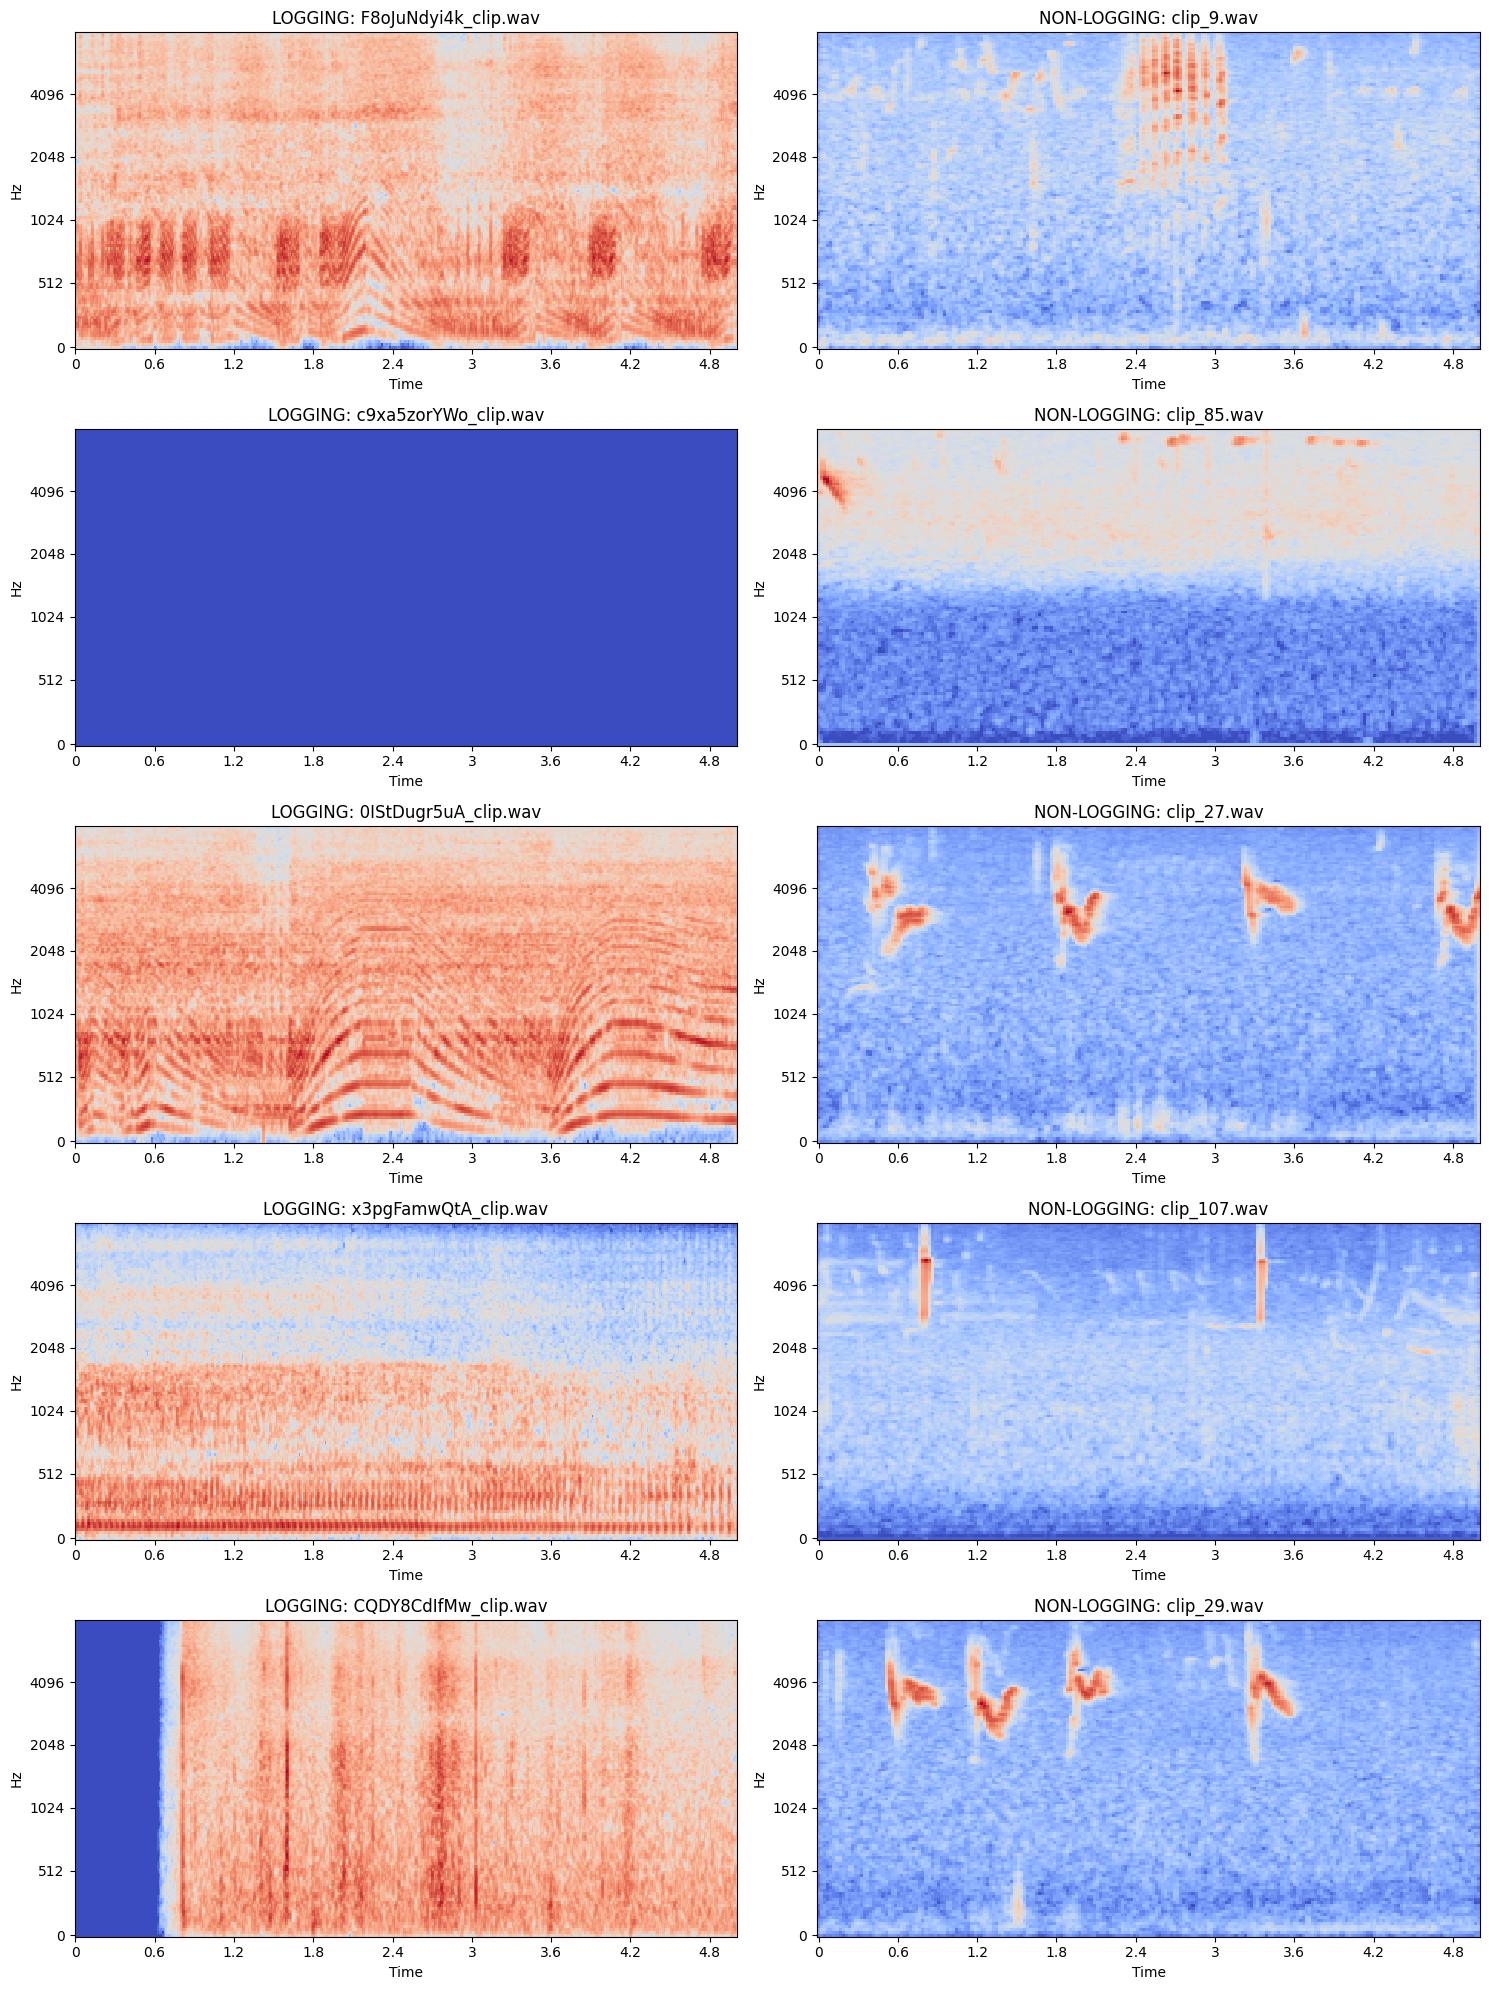

In [ ]:
import os
import random
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 경로 설정
logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/LOGGING"
non_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/NON-LOGGING"

# 각 데이터셋에서 앞의 5개 파일 가져오기
logging_files = [os.path.join(logging_path, f) for f in os.listdir(logging_path) if f.endswith(".wav")][:5]
non_logging_files = [os.path.join(non_logging_path, f) for f in os.listdir(non_logging_path) if f.endswith(".wav")][:5]

# Mel-Spectrogram 그리기 함수
def plot_mel_spectrogram(audio_path, ax, title):
    y, sr = librosa.load(audio_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)  # 멜 스펙트로그램 계산
    S_dB = librosa.power_to_db(S, ref=np.max)  # 데시벨 단위로 변환
    librosa.display.specshow(S_dB, sr=sr, fmax=8000, ax=ax, x_axis='time', y_axis='mel', cmap='coolwarm')
    ax.set_title(title)

# 샘플링된 파일로 Mel-Spectrogram 시각화
fig, axs = plt.subplots(5, 2, figsize=(15, 20))  # 5개의 행과 2개의 열

for i, (logging_file, non_logging_file) in enumerate(zip(logging_files, non_logging_files)):
    # LOGGING 데이터의 Mel-Spectrogram
    plot_mel_spectrogram(logging_file, axs[i, 0], f"LOGGING: {os.path.basename(logging_file)}")
    # NON-LOGGING 데이터의 Mel-Spectrogram
    plot_mel_spectrogram(non_logging_file, axs[i, 1], f"NON-LOGGING: {os.path.basename(non_logging_file)}")

# 컬러바 제거 (컬러바를 그리지 않음)
plt.tight_layout()
plt.show()

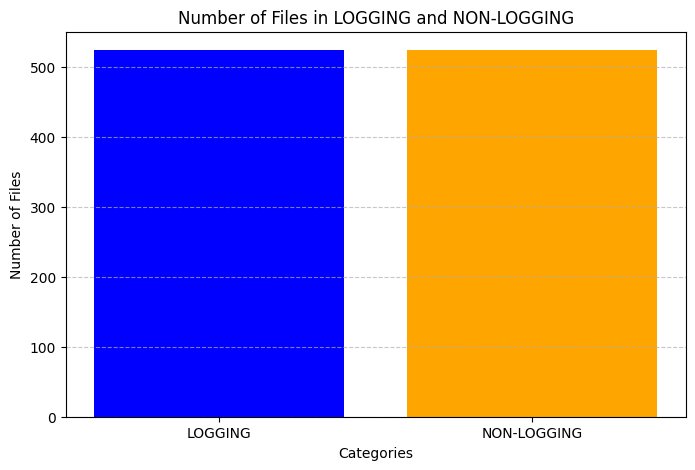

In [ ]:
import os
import matplotlib.pyplot as plt

# 데이터셋 경로 설정
logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/LOGGING"
non_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/NON-LOGGING"

# 파일 개수 계산 함수
def count_files_in_path(path):
    return len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and f.endswith(".wav")])

# LOGGING과 NON-LOGGING의 파일 개수 계산
logging_count = count_files_in_path(logging_path)
non_logging_count = count_files_in_path(non_logging_path)

# 히스토그램 데이터
categories = ['LOGGING', 'NON-LOGGING']
counts = [logging_count, non_logging_count]

# 히스토그램 그리기
plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color=['blue', 'orange'])
plt.title('Number of Files in LOGGING and NON-LOGGING')
plt.ylabel('Number of Files')
plt.xlabel('Categories')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 전체 데이터 -> Zero Crossing Rate로 변환

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 경로 설정
logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/LOGGING"
non_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/NON-LOGGING"

# 이미지 저장 경로 설정
output_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Images/LOGGING"
output_non_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Images/NON-LOGGING"

# 디렉토리 생성
os.makedirs(output_logging_path, exist_ok=True)
os.makedirs(output_non_logging_path, exist_ok=True)

# 모든 파일의 ZCR 값의 범위 계산
zcr_values = []
for path in [logging_path, non_logging_path]:
    for file_name in os.listdir(path):
        if file_name.endswith(".wav"):
            file_path = os.path.join(path, file_name)
            y, sr = librosa.load(file_path, sr=None)
            zcr = librosa.feature.zero_crossing_rate(y)[0]
            zcr_values.extend(zcr)

# Y축 범위 설정
y_min = 0  # Zero-Crossing Rate는 항상 0 이상
y_max = max(zcr_values)

# Zero-Crossing Rate 그래프 생성 및 저장
def save_zcr_image(audio_path, output_path, y_min, y_max):
    y, sr = librosa.load(audio_path, sr=None)
    zcr = librosa.feature.zero_crossing_rate(y)[0]

    # 그래프 그리기
    plt.figure(figsize=(10, 4))
    plt.plot(zcr, color='blue', linewidth=1)
    plt.ylim(y_min, y_max)  # Y축 범위 고정
    plt.title(f"Zero-Crossing Rate: {os.path.basename(audio_path)}")
    plt.xlabel('Frames')
    plt.ylabel('Zero-Crossing Rate')
    plt.tight_layout()

    # 이미지 저장
    image_path = os.path.join(output_path, os.path.basename(audio_path).replace(".wav", ".png"))
    plt.savefig(image_path)
    plt.close()

# LOGGING 데이터 처리
for file_name in os.listdir(logging_path):
    if file_name.endswith(".wav"):
        file_path = os.path.join(logging_path, file_name)
        save_zcr_image(file_path, output_logging_path, y_min, y_max)

# NON-LOGGING 데이터 처리
for file_name in os.listdir(non_logging_path):
    if file_name.endswith(".wav"):
        file_path = os.path.join(non_logging_path, file_name)
        save_zcr_image(file_path, output_non_logging_path, y_min, y_max)

print("Zero-Crossing Rate 이미지 생성 및 저장이 완료되었습니다!")

Zero-Crossing Rate 이미지 생성 및 저장이 완료되었습니다!


# 전체 DATA MEl-SPECTROGRAM 이미지로 변환

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 경로 설정
logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/LOGGING"
non_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Dataset_For_Training/NON-LOGGING"

# 이미지 저장 경로 설정
output_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Images/LOGGING/MEL"
output_non_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Images/NON-LOGGING/MEL"

# 디렉토리 생성
os.makedirs(output_logging_path, exist_ok=True)
os.makedirs(output_non_logging_path, exist_ok=True)

# Mel Spectrogram 그래프 생성 및 저장
def save_mel_spectrogram_image(audio_path, output_path):
    y, sr = librosa.load(audio_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # 그래프 그리기
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel Spectrogram: {os.path.basename(audio_path)}")
    plt.tight_layout()

    # 이미지 저장
    image_path = os.path.join(output_path, os.path.basename(audio_path).replace(".wav", ".png"))
    plt.savefig(image_path)
    plt.close()

# LOGGING 데이터 처리
for file_name in os.listdir(logging_path):
    if file_name.endswith(".wav"):
        file_path = os.path.join(logging_path, file_name)
        save_mel_spectrogram_image(file_path, output_logging_path)

# NON-LOGGING 데이터 처리
for file_name in os.listdir(non_logging_path):
    if file_name.endswith(".wav"):
        file_path = os.path.join(non_logging_path, file_name)
        save_mel_spectrogram_image(file_path, output_non_logging_path)

print("Mel Spectrogram 이미지 생성 및 저장이 완료되었습니다!")


Mel Spectrogram 이미지 생성 및 저장이 완료되었습니다!


> ## **TRAIN VAL TEST ==> 324 : 100 : 100 으로 SPLIT**

In [4]:
# import os
# import shutil
# import random

# # 데이터셋 경로 설정
# output_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Images/LOGGING/MEL"
# output_non_logging_path = "/content/drive/MyDrive/DLPROJECT/DATA/Images/NON-LOGGING/MEL"

# # Train, Validation, Test 데이터 저장 경로 설정
# base_output_path = "/content/drive/MyDrive/DLPROJECT/DATA/MEL_Split_Data"
# train_path = os.path.join(base_output_path, "Train")
# val_path = os.path.join(base_output_path, "Validation")
# test_path = os.path.join(base_output_path, "Test")

# # 레이블 별로 디렉토리 생성
# for path in [train_path, val_path, test_path]:
#     os.makedirs(os.path.join(path, "LOGGING"), exist_ok=True)
#     os.makedirs(os.path.join(path, "NON-LOGGING"), exist_ok=True)

# # 파일 나누기 함수
# def split_data(source_path, train_count, val_count, test_count, label):
#     # 파일 리스트 가져오기
#     files = [f for f in os.listdir(source_path) if f.endswith(".png")]
#     random.shuffle(files)  # 랜덤 섞기

#     # 데이터 나누기
#     train_files = files[:train_count]
#     val_files = files[train_count:train_count + val_count]
#     test_files = files[train_count + val_count:train_count + val_count + test_count]

#     # 파일 복사
#     for file_name in train_files:
#         shutil.copy(os.path.join(source_path, file_name), os.path.join(train_path, label, file_name))
#     for file_name in val_files:
#         shutil.copy(os.path.join(source_path, file_name), os.path.join(val_path, label, file_name))
#     for file_name in test_files:
#         shutil.copy(os.path.join(source_path, file_name), os.path.join(test_path, label, file_name))

# # LOGGING 데이터 나누기
# split_data(output_logging_path, 324, 100, 100, "LOGGING")

# # NON-LOGGING 데이터 나누기
# split_data(output_non_logging_path, 324, 100, 100, "NON-LOGGING")

# print("Train, Validation, Test 데이터 생성 및 저장이 완료되었습니다!")